*7.29.2023 PM*

<div class="alert alert-block alert-success">
<center><h1><b> Datathon Initial Category Exploratory Data Analysis / Data Understanding </b></h1></center>
<center><h2><b> Part II </b></h2></center>

<br/> 


Objectives:

    *   Understand the data with a) Descriptive/Summary Statistics and b) Data Visualization (graphs/charts/tables)
    *   Determine if data makes sense
    *   Identify data patterns/trends/gain insights    
    *   Identify key Vars
    *   Determine if data wrangling/cleaning/scrub is needed (identify imperfections/probls in the data)
    

</div>

***

# Data Collection

## Imports and dataset extraction

> Getting started

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow


In [2]:
# Rod's standard variable for a DataFrame is ds as acronym for data set


datathon_eda_round1_pkt_file = "/Users/dslab/datathon_72923_EDA_round_1.parquet"
ds = pd.read_parquet(datathon_eda_round1_pkt_file, engine='pyarrow')


## EDA 

> Beging working with smaller data sets

In [3]:
ds.reset_index(inplace = True, drop = True)
ds.head()

,asin,score,reviewText,reviewerID,summary,timestamp,verified,date,year,month,day,day_of_week
0,0871202433,5,"Robert Sylwester's much overlooked book, A Cel...",A2API7H1WS1C56,"A Celebration of Neurons, by Robert Sylwester,",1997-08-09,false,1997-08-09,1997,8,9,5
1,0061535680,1,"Trivia. Dialogue waste of time, paper and add...",AAW5NRUVURHU2,poor entry in derby of books written by lawyers,1997-08-13,false,1997-08-13,1997,8,13,2
2,0316332259,5,Twenty years after his sudden death and a resu...,A1IBMUD9XXD68X,An Icon of His Era And Of All Time,1997-08-17,false,1997-08-17,1997,8,17,6
3,0933149581,3,The author writes about the education of speci...,A1LOZWO9JTN5L8,Wings to Fly: Bringing Theatre Arts to Student...,1997-08-21,false,1997-08-21,1997,8,21,3
4,0356108163,4,A really nice collection of stories by Stephen...,A2ILUXA828DESI,No bones to pick about this book,1997-08-23,false,1997-08-23,1997,8,23,5


In [4]:
# Feature engineering by addign a constant that can be useful later

ds['cnt'] = pd.Series([1 for x in range(len(ds.index))])
ds.head(1)

,asin,score,reviewText,reviewerID,summary,timestamp,verified,date,year,month,day,day_of_week,cnt
0,0871202433,5,"Robert Sylwester's much overlooked book, A Cel...",A2API7H1WS1C56,"A Celebration of Neurons, by Robert Sylwester,",1997-08-09,false,1997-08-09,1997,8,9,5,1


In [5]:
# Data set to understand scoring over a timeline

score_timeline = ds[['score','date', 'cnt']]
score_timeline.head()

,score,date,cnt
0,5,1997-08-09,1
1,1,1997-08-13,1
2,5,1997-08-17,1
3,3,1997-08-21,1
4,4,1997-08-23,1


In [6]:
score_timeline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499752 entries, 0 to 1499751
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   score   1499752 non-null  int64         
 1   date    1499752 non-null  datetime64[ns]
 2   cnt     1499752 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 34.3 MB


In [7]:
one_star = score_timeline[score_timeline['score'] == 1]
one_star.tail()


,score,date,cnt
1499714,1,2018-09-27,1
1499716,1,2018-09-27,1
1499727,1,2018-09-27,1
1499729,1,2018-09-27,1
1499730,1,2018-09-27,1


In [8]:
one_star.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117964 entries, 1 to 1499730
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   score   117964 non-null  int64         
 1   date    117964 non-null  datetime64[ns]
 2   cnt     117964 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 3.6 MB


In [9]:
grp_one_stardf = one_star.groupby(pd.Grouper(key='date', axis=0, freq='M')).sum()
grp_one_stardf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 1997-08-31 to 2018-09-30
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   score   254 non-null    int64
 1   cnt     254 non-null    int64
dtypes: int64(2)
memory usage: 6.0 KB


In [10]:
grp_one_stardf.tail()

,score,cnt
date,,
2018-05-31,1125,1125
2018-06-30,1043,1043
2018-07-31,689,689
2018-08-31,476,476
2018-09-30,267,267


In [11]:
grp_one_stardf.isnull().sum()

score    0
cnt      0
dtype: int64

In [12]:
grp_one_stardf.max()

score    2385
cnt      2385
dtype: int64

In [13]:
check_zeros = grp_one_stardf[grp_one_stardf['score'] < 1]
check_zeros

,score,cnt
date,,
1997-09-30,0,0
1997-10-31,0,0
1998-02-28,0,0
1998-03-31,0,0
1998-04-30,0,0
1998-08-31,0,0


In [14]:
indexzero = grp_one_stardf[ (grp_one_stardf['score'] == 0)].index
grp_one_stardf.drop(indexzero , inplace=True)

In [15]:
grp_one_stardf

,score,cnt
date,,
1997-08-31,2,2
1997-11-30,2,2
1997-12-31,2,2
1998-01-31,3,3
1998-05-31,2,2
...,...,...
2018-05-31,1125,1125
2018-06-30,1043,1043
2018-07-31,689,689


In [16]:
check_zeros = grp_one_stardf[grp_one_stardf['score'] < 1]
check_zeros

,score,cnt
date,,


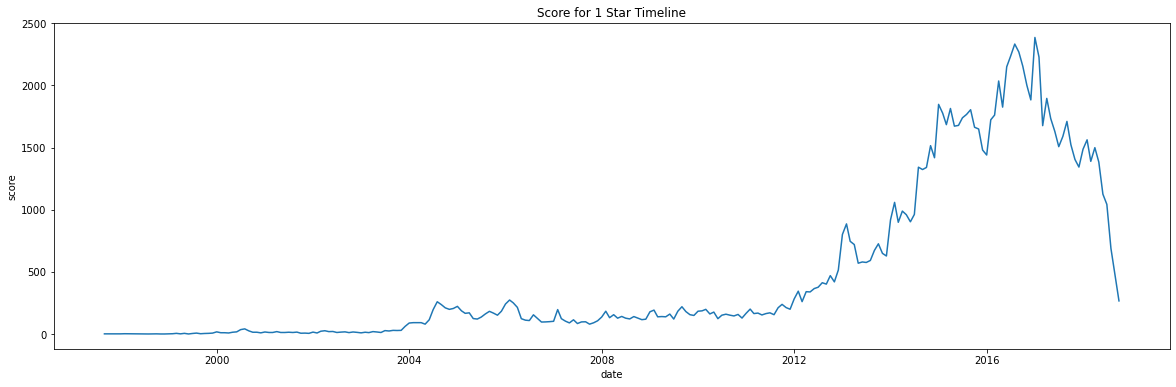

In [17]:
plt.figure(figsize=(20,6))
sns.lineplot(x= 'date' , y= 'score', data=grp_one_stardf).set_title('Score for 1 Star Timeline')
plt.show;

In [18]:
# Now to view all scores together

grp_scores_stardf = score_timeline.groupby(pd.Grouper(key='date', axis=0, freq='M')).sum()
grp_scores_stardf.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 1997-08-31 to 2018-09-30
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   score   254 non-null    int64
 1   cnt     254 non-null    int64
dtypes: int64(2)
memory usage: 6.0 KB


In [19]:
grp_scores_stardf.head()

,score,cnt
date,,
1997-08-31,37,10
1997-09-30,67,15
1997-10-31,86,20
1997-11-30,76,19
1997-12-31,85,20


In [20]:
grp_scores_stardf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 1997-08-31 to 2018-09-30
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   score   254 non-null    int64
 1   cnt     254 non-null    int64
dtypes: int64(2)
memory usage: 6.0 KB


In [21]:
grp_scores_stardf.tail()

,score,cnt
date,,
2018-05-31,50826,12046
2018-06-30,45829,10908
2018-07-31,31971,7518
2018-08-31,25766,5957
2018-09-30,13658,3196


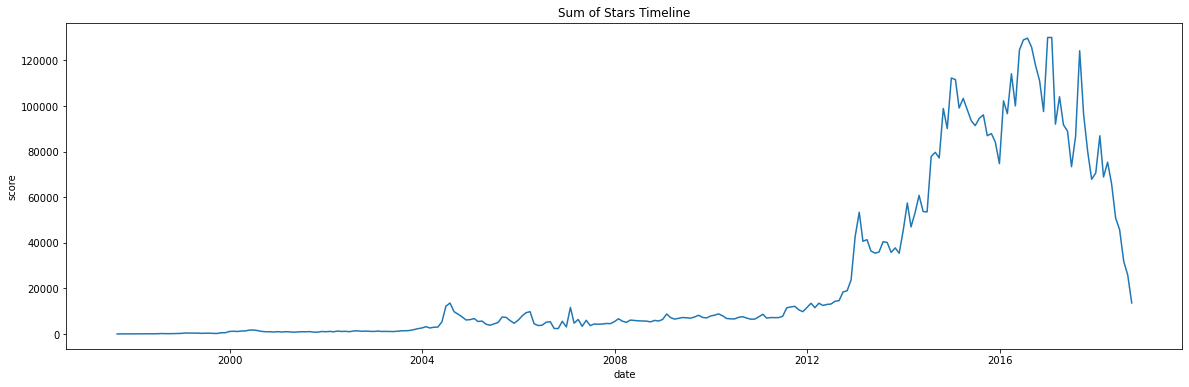

In [22]:
plt.figure(figsize=(20,6))
sns.lineplot(x= 'date' , y= 'score', data=grp_scores_stardf).set_title('Sum of Stars Timeline')
plt.show;

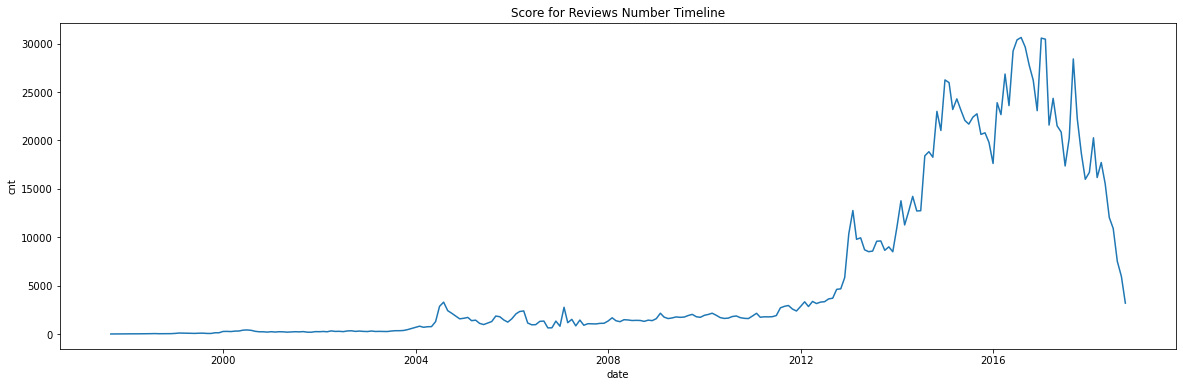

In [23]:
plt.figure(figsize=(20,6))
sns.lineplot(x= 'date' , y= 'cnt', data=grp_scores_stardf).set_title('Score for Reviews Number Timeline')
plt.show;

In [24]:
# Tried one hot encoding for the sku (asin) but was Unable to allocate 181. GiB for an array

#xtst = pd.get_dummies(ds['asin'])
#xtst.head()

In [25]:
# Loop to check all unique asin 

for asin in ds['asin'].unique():
    print(asin)

0871202433
0061535680
0316332259
0933149581
0356108163
0316328227
0969976100
0002553341
B01FIVVDF6
000637588X
0934641773
0356206041
031626122X
0910240124
0061673234
0061582425
0061567132
0743453271
0061711381
0932857108
B019ESGNEA
0061474185
0932807445
0356188434
0934678820
0935796223
0837169364
0061555819
1974324443
0061457841
0935523596
093406105X
0922915199
0932482201
0061717096
0006388108
0964165805
0316296198
0061582417
0965109208
0932838057
0933180098
0316314927
0963117777
0061473081
0935012230
0936644125
0316325767
0061715727
0962875988
0839804504
0316323187
0887841376
0061710385
0876041578
0934378142
0897932293
0876056788
0061582999
0934793565
0934581010
0913746061
0743445562
0743462823
0001842501
1564141985
0936896000
0843711728
0936784229
0964742098
0404053785
0707303494
0935637222
0933149859
0735623198
0735609195
000217796X
093402670X
0001841777
0002154064
0807118206
0936784997
093502879X
0002159643
0929480279
093305016X
0824713869
0875521274
0934061203
0936488395
0964843757

B00024I2XQ
B0002C4GW4
B0002BO06C
B00029J1UY
B0002F9BL2
B0002F1G9C
0964434539
B0002E5O9Q
0964434504
B0002H4MB4
B0002EQJWW
B0000X0VU6
B0002KT9BY
B00027JYTO
B0002DD692
B00024I2KY
0060726083
B0000CC64I
B0000UXXS6
B0002DUSKC
B0002C4IQS
B00020HB3C
B0000C4G79
B000231V62
B0002EP34M
B0002ERWZA
B0002F1G6U
B0001659D6
B00029J21W
B00005NI6L
B0002T74QC
B0002EXH68
B0002F1AAM
0934411344
B0002F0MCE
B00028DNCW
B00018RR3Y
B00022LIZC
B0002IQJTQ
B0002C4ITA
B00022FWN6
B0002CX1ZW
B00029R5MK
B000269S6E
B0001ZDK7O
0002712547
B0000TSJU4
B0002B161Y
B0002L5840
B0002HJF34
B0002IQC48
0743463560
B0002KQNUE
B0002KQO44
0936552107
B000244O1U
0743470346
B000255K3A
086112071X
B00023P44W
0743486250
B00015XMDG
B0002LJUCG
0965308677
B000286RYS
B0002DB55Y
0743464907
B00027J052
B0001CKX2M
B0002KQO30
B0000D8HRK
B0002B0RXM
B0002F4SDS
B00024759S
0933451253
B00023B1GW
0137066740
B0001B86GS
0006132499
093331910X
B004TZGT4I
B00022LIS4
0002551497
B0000E6S10
0936279060
0934977135
B00026YO36
B000295TXC
0932704530
B000255LJS
0006140904

B000WAYZJK
0633198412
B000B9SKP2
B000WN2CQ0
B0000EZQ5K
B000YJPY3K
B000W0D9VK
0933224621
B000VN32O2
B000VL2TXE
0936185783
140272943X
B000WUCR8Q
B000VY8VMO
B000X8ZQBW
B00DTSLWRA
B0000XMYFQ
B000F4YOWQ
B000X3S6IC
B000XWXKXY
B000W3PH08
B000WTMHXM
0004133889
B000WKPH92
B000VS2IHE
0849371821
B000XPC5FA
B000W75YAM
0870622676
0979759404
B000XV4TBC
B000VE7HJ2
B000YTHU5K
B000VUPUOU
B000W5QNXG
B000XY6UMU
B000XEALJS
1424194482
B000W8SSNG
B000W2DAQC
B000VPNWIG
B000W5MWG8
B000WCXHZQ
0934860114
0935607102
B000VFNHYK
B000WW3TKY
B000YJPVM4
B000W2NZBW
B0002N4JP2
B000WPDKOQ
0964363410
B000VTUNB6
B000Z1NPMO
B000XZKV2Y
B000P551HM
B000JM932U
B000VZFNJC
B000VXP0ME
B000TZRO8M
0852977123
B000VS8HZQ
B000X22YTK
B00CJ23FG8
B000XSI3VW
0935127003
B000WQOYIG
0935217304
B000W8U5B4
B000WKSZ32
1434341763
B000XDQK2G
1419677454
0061551821
B000WPAHHO
0912006293
B000XVAMPE
1410776085
0735625336
000470763X
B000VMWGK4
B000YG555K
0932944345
0061567582
B000YMLCXI
0935004033
0735623414
B00016W6NC
B000VXZXCQ
0889372403
093229409X

0961144467
B000Y95BLK
B000VZSP0G
1448919045
B0000AX9O6
0935008586
0061655937
B000WUC71S
006170654X
0975286048
0934860572
B0027BIIOU
B000X2B5U4
0061673420
093659506X
098181848X
B000YOZIZ4
1116578956
B001OZHBCA
006171299X
B0012TTBNA
B000VVFUN0
B002W269T0
0933812132
2067118870
0979846420
1438996357
B002997SKK
0061582697
0934868255
B000V6OZVI
0961409509
0933424825
B0000DBML2
B0029YBA8G
B0000YB7RG
B002MTPHGY
0061661236
9888035193
B000VEHT7W
0935284710
0061566144
B000W8XQS8
B000XE260U
B002UJTTCE
0933405049
0970670141
B002R9E38C
1878257501
B000WTKANQ
0300114427
1421521652
B000XZCKZ0
B000YFT34K
B000VVVMYQ
B002UV8N8S
B000YRQT04
B000VY63J2
0936489634
0984377409
B000WQ96NE
B003141N6M
B000XVP7YU
0932506666
B002ACZ72W
B000HE4OJ2
B000VL5VES
B000V8BSA2
B000WX4IMG
B002997SJ6
0517594951
B0025TK5UO
B000Y9KLTW
0935626506
B000NFGLQY
B000VAQILY
1411658825
0975262777
B002TJK0IW
B000W0OVV2
B000YQSL2E
0002257696
093286368X
B000YSU8YQ
0061628352
B004TRSKS4
B000WR81LQ
0005235863
B0028S110U
B0012X4BHW
B000XYUJSG

B0047OFTKG
B0042GB3TK
1463793138
B000VRFXC2
B003IEYH3G
B002R0DUMQ
B004TOV85E
1112457747
B005AMUTJ0
1425747132
B001AI6XLQ
B005D5MNHU
B000XZGZF6
146377236X
B005C7UXU8
B005BRESFK
B005ETRVKE
B000XQILO8
0979955262
B004TQL29O
073565672X
1463756917
1463685807
B001A5SQJ6
1463753829
1441999337
B005AJ9BEC
1435711653
B000VDH3B0
1463771576
0935878165
0981919898
0983340404
B000UNN6SK
0933180888
1463781180
006171433X
B001B59AGI
B00JF9T9JA
B0009GJGL4
B005CXZHPI
B005CRQ4Y2
B004B27ZE2
B004HKD1NW
B00466Z7TI
B000I806KS
1426950748
1463708343
B005EPLWWG
1463766483
B002C77RXC
B00572QEYM
140546576X
B005DUKUD4
B005524CK2
B0057HLNRA
B005A1IMZY
B0001MRWOE
0982114591
B004BHP7EC
B0057OCK1G
000219984X
B0058DKXE2
B0058V0ILW
0002197189
B0007R7EIC
0935278443
0005064295
1463771614
1463719019
B005CXMZRQ
B004UJ983M
1463774494
B004MGCZKG
B005C20HS6
B004O9KCM4
B001RNPQ9E
1463786832
B000IEQ4DA
1463789599
0933782187
B0058J0G8O
1463779046
B001B6L6GY
0875896057
B00431SCR0
B005C0YEXM
B003SQPQRU
B004IWV7GM
B001AV18PO
1463720033

B007I7A4WW
B007KPPRS8
B005CRVXNY
B00762YW40
B007COTUZ8
B0059EQ4I4
0933146507
B007LP7IOS
B007U11ESE
B007RJIS5Q
B006ZLSJA6
B0076GLRR6
0932877079
0934798567
B00BUFZUMW
B007PMQYP6
B00775D6WA
B006QQ0SQS
B007YX9BGK
B006ZD49K8
0983773998
1176068776
1245548743
B0080W2VFM
B006MCIK8O
B007U134PU
B006UJF0SW
B006O4R1LC
B006UKHH28
1145136737
B007XL3ZQK
B007TS1H9Y
B0076NTK7S
B007BV6XD4
B006RXUFPE
B0077UNS50
B006VH7G76
1149394714
B005DJM83U
B006QY5FPY
B007PRV1KO
B006ZD0O4I
B006VYN6VO
0982100213
B006WUGK2E
B000XQXIT6
B006SP1MB2
B006NA2446
8490150451
B006OS6ZLK
B004SKBT0S
0061692042
B007IO1S3E
B007ANZ3SY
B00712LONC
B001BCK4A2
B007WKBWLW
B006ZYUB22
B006OVWCQE
B007JNJNI6
B006LWRNU6
B006ZATWO4
0984839607
B006XL2C4C
B007BTV34K
B004UJ1AJC
B007A2LJSI
B0074CPR9Q
B0007QAMAK
B004UJ9DY6
0981514987
B00BS96I26
B007A2PWU4
B006KCZD7M
B004TPUQC4
0894473271
B000Y9PJ4E
B004J5EY22
B007TAPGR6
B007VXOQHM
B007YVLIO0
B006M7JQIC
B006ZIKIB2
B007KM70NQ
0935312595
0931998018
B000VY550A
B006M64H1O
B006NNUQ9I
B007HS0YJK
0934601763

B007PJ4P3M
B006T7MCEA
B005C6DLNK
B007PEW692
B007JDC48W
B006PAX0QA
B008WI2TZ6
B00728NDFW
B005CW9MF0
B007G49NYM
B007INO2H4
B005FKN598
B008JHAI3U
B007X1Q46I
B007UT9ZQE
B005F2Z4ZY
B00E0CVZFI
B006P0QSZA
B007ZFUUJO
B007ZG10HO
B006TODMT2
B006WJVDL8
0002199203
B009RBJVL2
B007HS5F2G
B006YGS36C
B007C0VKDW
B007G2XSZO
B006WRCXFU
B006U91R52
B006U9OV64
B005E3NO3S
B006QZ89N8
B006PQ4OAK
B006PQ4PHM
B006OSM1PE
B007F3ZB9K
B006QJU0AY
0933053061
B005F25GXY
B005EXOQDA
B00732NT7Y
B007NZNZ2K
B005E1Z974
B006V2RAK4
B005DMC4K4
B004U37510
B0073BFQXA
B007C8C6LO
B005DTK1WA
B005DI4FZK
B007BW6WIE
B007HZEPFM
B0073BFS8S
B0072NZM9W
0970157908
B008O34Z8I
0940267314
0934770360
B000BL2Z1K
B007V4ZF3U
B006NUAAJM
B006M6PF1A
B007E6HYZ2
B006ZAODVG
B001BAGKNO
B006ZQF5Z8
B008UFA9U8
1432812033
B008QV4E7A
B007OWQU92
B007KPVMGY
B008KNDGC8
B007JFNQC8
B006KE9GPK
B007BHWDRS
B004UJAZHU
B007BHFVUY
B007BQHU9U
B007K3RQXO
B0073L4RYE
B006MYTS9C
B007NLVOH2
073566613X
1432967924
B006OF156I
B005GT0IWA
B000VB043G
B0071MHQK2
B006OREHYI
B006YW3A96

B005B3LOWO
B006LEZB3U
B004TWAL4A
B007HRKCP2
B006LUCIF8
B005FRK2OC
B006TVOGVS
B0074TNKS4
B0070R995S
0933449291
B007V31WM4
0935696938
B005I4J752
1423484940
1422460983
B0078S1ZWE
B000NRTV50
B007C79OBA
B005GIPLUU
B005CW4ZNY
B007K9C6J2
0984972102
B005G7QGUU
B005BRRTRY
B007CQ2K9E
B005F25API
B006QXMI78
B00727L3J6
0002155133
B008LZ9MKK
B007IX1PAQ
B006TH3J4W
B005FDOE6S
B004BFVSFQ
B007JJU7GM
B006ZQL6WE
B007HY34SM
0943549752
0976703408
B0071MJ7OU
B006K4RJZE
140842746X
B000VVGPFC
B000E4A5MK
B006QZ5DG4
B006OBAQQ2
0981923895
B000YQWNU0
085331344X
B006RM5YII
B006UIBKPK
0916656152
B007FNHRCO
B008S1EVVW
B006T8YQXY
B0078K8UKC
B006QUJGCQ
B0056QJL6M
B0075MJ13I
B0074OKYZ6
B006P3AKM4
0870128051
1449077846
B006UHAW1E
B004TINE20
B004Y0QII0
B006K3438G
B005VIKS30
B006W8SOQQ
B007PVQR3Q
B004UBTJUW
B007XZ7I8W
B00727LESG
B006U8UF74
1424171687
B007C7CE4O
B007NY89F4
B007XJAZO2
B006P5BDAA
0531047040
B007J66HF0
B006OFX6TC
B006VFS3Y8
B0072VAYBU
B004MMEM2E
B007P5DNHK
B006O7FQNE
B007JCLZC4
B006LMW6TO
B003EII886
B006M0IQ8U

B004U7FJ4G
B006QYTIC0
B007N6U74S
B006RBJLVK
B007Z92R3M
B007OSQ0TG
B005TKCAP4
B005I6743M
1421838478
B005DMIACK
B006P08T5W
B006TM1BWY
B007IJ7W2K
B002PVNWDO
0936206055
B00BUFT0IC
B006OGPAYA
B007JWMDM0
B001A4986W
B006OPFUSW
8877151390
B00BUFZF0E
B005E369AI
0230217117
B004UJ8MLQ
B006SANX82
B007GHSICM
B005HVYRKG
B007OM5520
1439224587
B005FXAZ5M
B006N90J6W
B0062HV6R6
B005EA305I
B006LWU8NA
B000W6EUOE
B007BHG536
B009OAAF8O
1475249829
B00CLDSS1C
B007PM4CM8
0923993444
B006PKZZ7W
B007JNHGJ4
B007CO6VE6
B007R1F622
B006LR89NG
B008TVO170
0933387024
B007PT5H52
B000WWWEZA
B007PWMZPY
B00AR0XNK2
1425537855
B006JSQX7Q
B0079Q7Z92
B006TKMJ1S
B006MOXGH2
B007NMSUR8
B0074W9V0M
B00BSVYX26
B00703KA2I
B006X5W3YW
B007HOOC3I
B005FSIM4I
B006X1HU8U
0933920318
B000VS6TB0
B006RM4PAG
B000WUVVOC
B006L8T6QE
B006K0UGBM
1416001719
B005EZ26EE
B005GQFY18
B00BXTX4YG
1430245395
B000P4RPAE
0842367993
0971023050
B005FGLL0C
B006UDCI1K
0933920326
B006TM9TTQ
0984847707
B005CRRRZC
B005587JTW
0932838081
B005GXQOZ6
B008MTYTWQ
B004UD59R2

B00C8R3D7U
B00CI5M8Z0
0006281575
B006PI2BT4
B00DZFH61I
B00C9QX0YQ
B006MI8RI6
B007RKS1J8
B006QQVGGY
B005HH13VG
B006LWCBP8
1288862539
B00CDLKC84
0989393321
B00COLZZNK
143923504X
B00C7Z2FHW
B00CPXFJJW
B007Z0KUOE
B006TO5G4Q
B006NBFAJQ
B00E35RWZ4
B004UJ3FHM
B005D6DPSA
0866911359
B005CQPKM0
0590226290
B007SQB01W
B007P637DY
B007087R1K
B00CN7UXXM
B006OSUATI
B006U93YVC
B005GXN6R0
B006S83MUI
B00COMDKCM
B006X97WM6
B006Y33ILK
B002SY8CRO
B002A42RSC
B007OZMKBQ
B007GBGQVS
B006U24PJ4
B006ZGQFVQ
B00CCK79NW
B007MHPH1G
B00FEMU0I6
0935108378
B006NOF2D2
B00DU4H00Q
B0070287YW
B00CREC86Q
B006ZD3T6S
B00CDCN2S0
B005EXO068
0006267114
B00CJ80ZR4
B005GIOSBI
B007J5L9SG
1172822328
0978631803
B006KP1724
B0071GPXT4
B000WV5HHS
0886291119
B006MMMKUI
B0079WLGY6
B005GYLLP8
0735336849
0615882307
0985923113
B00CMQCQ9S
B00BSEQOU2
B006VDPEK6
B007XZ37GE
0936546085
0806142278
B006N91Q8W
B00D00IZW2
B007MB4LC8
B006RBHI06
B005EXZ5B2
B00CJ1ZHCO
B00CKMHGEO
B007IXK426
0936028149
B006PGZZ12
B00BUFS470
1463660766
B007OWQIDU
B008MB1K7G

093285964X
B00GSGK5Z0
0992668611
B00GU6JCGQ
B00GR0LIXU
B006UWLI1W
B00GOJFXBC
B006MCINX6
B00CONTZQQ
B00GOQ76WY
B00GU320HM
B006OR6RFU
B00GNMGCZG
B006QP4UTK
B00GKZSRNQ
B00GNS0R8I
B00GPJCW2Y
B00GQ2NY9K
B00K7HBDA2
B00CKEIAN8
B005GDTT4Y
B0079QGF2A
B003ZTCG0K
B00GQ7570O
B00GOG9I1G
B005GIQA46
B00GT3QMWM
B00GRWB43C
B00GNDBNE0
B00GN9971U
1436325420
B00DY9YK8W
B00GS1X0EI
B006R8IGN2
B005FAOGM8
B0077XRT8E
B00GNB1C66
B005EGII7C
B00GTK9YQG
B00CTRUMIC
B00GNBMALM
B006Y4FQS2
B00GU3N38C
B00GNNNBX6
B0000XMU4Q
B004UBPEL0
B00CNNJJGS
B005DRTGWI
B006YNEGVQ
B00GO6W318
B007ZL582W
B00GP2GHU4
B00BVQZNOA
B00GW44UUO
B00I5MBUKE
B006LR5MHW
B006RD6D0U
B00GS60P6Y
B005CPZPCQ
B00GQ71K9Q
B00GQ7DKIU
0988587327
B00GQ75VDW
B00F9TUDT0
B00GOKAMK8
B0041WJYJG
1274452902
0935400192
B00GU4Z0FA
B007ROZ7XC
B00GOJXRMO
B007UT5ZGS
B000YGO8S0
B004TQ43SQ
B00DVLW224
B00GVMB7US
B008I0GMBK
0982955871
B00DZH8E9O
B00GRSOZI2
B00GVG0NKO
B00GNP2NCE
B0000C4GAM
B00CFPMVNW
B005PP47U4
1428871357
B00GL3VWR0
B005HYJ7LM
B009L25BW0
B00GP815Q4
B008LXAPT4

B00JNR20N6
B00JNTIOLQ
B00JNZIOY2
B00JAXSKG4
B00GTRUARQ
B00JIUBE76
B00GOM0AIU
B007ZGJOR2
B00GTG18ZA
B00JNLJD82
B00GTABQN0
B00GPD9SDQ
B007C80T3Q
B00JHVHPI8
B00JHP9AZA
B00JM7OKK8
B00JKNIF64
B00JCD1II4
B004TV15GE
B00GQOYXY8
B00JKG2DFU
B00JKS5HQ0
B00CSUULOK
0310916291
B00JDXT3NU
B001B5E2SO
B006QYYSRU
B00GSLR0GM
B00JKV3KSO
B005ERW0V6
B00JKY957G
B00GVGBADS
B00GQQ0JGW
0987501909
B006K3HMSE
B00GO2AG7U
B006M21OQY
B00JE1P43O
B00JJPZAFW
B00GPXG226
B00JJYW9KM
B00JK59YOE
1503102009
B00JBQC4TO
B00JONKLVM
B005OR80RO
B00JASPSK0
B005GDFLXW
B004UI284E
B00JOGIOOU
B005Y0Y098
B004Y7E5E2
0934738351
B004TU2LPY
143278689X
B00GN7F0W2
B006Q4SSD0
0983744319
B00743L0QE
B006OW0OYU
B00JBDFL7O
B00GP81J0Q
B00GNNR3NK
B00GOKA9N8
B00002N8YX
1503347982
B006KYZ2LC
B00J9V9DS6
0991233212
0934269041
B00GQRDQAW
B00GKUWNLI
B005GLDRIK
B00BPHFMF0
B00J9S2GVU
B006W1B9BK
B00JH3R928
B00JH6I43S
B00GMQ50ME
B00JGF0EQU
B00JKV3C14
B00JNTISSA
0983151989
B00J8ZHX4Y
B00JI9OY6K
B00GR8SIDA
B004ZRLT8Q
B00JHOFPPU
B007JZF7C0
B00JHSD9RW
B00JHOFRE4

B00GUQKFA8
B00GLHCAXQ
B00GNO888S
B00K5ZCOIQ
B00KG72XYS
B0071GSMKQ
B005GGIQ1S
1490377409
B007JIISZU
B00JNRGAJG
B00GVMRLAS
B00BUFX4X4
B00JA31HAA
B00JEN1YB8
B00JCVK0B2
B005G87F2W
B00JMVDYVA
087353705X
B00GQQSTIW
0958418853
B00GTEM4G4
B005EB8B9M
B006QQP8KY
B005FT3JEU
B00K6BVK0C
B00BP6QGIS
B00JBQSUWE
B00JGCDSQG
B00GS8BGF6
0936077301
B00KFF4JY8
B00K6ZQSQY
B00CLVTAXE
B007ZFPWLA
B00K6RV93Y
B005CSDX72
B00GS50E8O
B00JH3R25M
B00K6T6892
B00JJ31QTI
B00GT6J3GG
B00KFKDW50
B00478B9P6
0919893716
B00BOXL0LK
B005GDG5P0
0981969372
B00CRLQY7S
000421546X
B00JFU5JG6
B003N8YYBW
B00GP4IT9O
B00B5U4V1I
B00KIDXXF8
B00JAX62G4
B00N3QCEDY
B00JE2AM1M
B00JIE83XA
B006QEW2E6
B00GMEI5RI
1416293655
B00JCJDRSW
B00KLE9BTG
B00GN55Z56
B00GN2RIRM
0002241889
B001ASDVY8
B00CJ39XU4
B000WE9XR0
0976191695
B00KE66NUG
B006Q5LC78
093303122X
B00JBVWDC2
B00JMOT5NS
B00JMQGQ6K
B00KLN4WLY
B00K60NIQW
1490413278
B004UJA96C
B00JB3PLZ6
B00JGT1FGY
B00JCDNY86
B00GNLR6TS
B00C97O882
B00JBK7E0Y
B0012TYSV0
B00GNBOYZ2
0473271087
B005CRE07K
B0072JA6NI

B00GNME1WC
B00GURMWI0
B00K6ZO0DM
1502743035
B006Q2UALK
1502701251
B00GSDRJFC
B00J9SJS66
B00E1NEIXM
B006PRLJR0
B004TQU0QA
0935741178
B00GTQUO1E
B00CEWFG38
B00K6ZO7T4
B00KQ3S0SK
B00N1RL3GY
150257683X
B007S0NDJK
B00K6KZAYK
B000WHKSL2
150275276X
B00GQG7VX6
B006VGJSNC
B00GRGV4X8
B00MN4YCG4
1502586010
B00792VD4O
B00GVAPNKA
1502544369
B00JFZ8EK4
B006SJMY9W
B0070FVZY8
0992572002
B00JH1BLKQ
B007DQGLA2
B00MMW1KHG
B006MIVLES
1502752468
B00JGQ7UG6
B00GQ6SI1A
0932653235
B0050PQUG8
1502725932
1502721171
B009VEP2HW
B00N0I9SX4
B00GMW4LDM
1420881809
0865262721
B00K7HCUCW
B00JBWJATA
150275536X
B00K67BCVI
1502581949
1502711273
B000GPV8P0
B00GLSJDNK
B00MP1QHNG
B00GSZSRUQ
0936661127
B005GC724E
B00HGKOLSE
1575257955
B006U41DNI
B00CD2TYSM
1502579995
B00J7I7PK4
B00GQQXDME
1163825581
0990614107
0988508109
B005HJP43W
1502790165
B00JNWP9OI
B00GV6VAP6
B005D4U6MA
1502582953
1502700123
1502738937
B00JMO9VKK
B00KKL24B2
B005GDFMA4
B000BOATAQ
B005GW8UC2
B00J9VLIXY
1502748851
B00C6UXPUY
0936077425
B006N4UORQ
B006O4E54I

B005GGS0A0
B00JBJK6KU
093672899X
1502857324
B005DQ0SO4
B00JDUOWWU
B00KGKF2RA
1502887991
B007MTS2VQ
B006L8AQ0O
B00CJUTJ6U
B00021TNOG
B006M169TM
1503014215
B005IIR8GS
B0052OYEME
B006LMPLZ0
150307725X
B00MSNFV2O
B000W3V2TS
B00COBJHS4
1503239551
B005EXNYZG
0933227981
B002C5AG3W
B00J80SMI0
0006141188
1438450567
B006O0MDLE
1503016366
B00CA72X60
B006RM0CBC
1502492253
B00BUFW6C4
0870836323
1503291448
B00BWL3HXI
B005DX6T4A
0323264069
0071606432
1502981270
B006OEX9X6
1415878145
1418010448
0936085258
0947792317
1502972204
B00GKZKLAS
B00K5XWONI
B00CIBOZOQ
B00CD7C4SY
B00J80NZKU
0916150844
B00JMF2RPU
073533983X
033524680X
B00K6KKQDU
093307512X
B001AX8634
B00CIKCFIK
0944508936
B00JHG1PMK
B0092Z7XDG
1503354083
B00GSZSTD6
1503143368
1502596393
B00JHUSRK4
B00793T53O
B005EHHKXY
0934474885
B00GS7TEII
150287699X
B00GN4CO4W
B00JH7JNBE
B00KHEDALA
1312360100
1502931230
B00JFMW7VO
B00JNU17BY
B00JCC5HW8
B00MPZNUOQ
0932680003
B00BNG44WU
B00TED7P98
B00MN215Y8
B005D8KGO4
0935607048
B0069AOP74
B00D24QV22
B006M0MFVO

1503038238
B000PHBCZK
1502784394
B00CHRW7PU
B000WOEJ5G
1503174921
B000VY80AM
B00GT31AN8
0471852201
B00T5EE8WS
B005EY591M
1503511642
B00JNIHIPA
0935848037
B00GT7LIVI
1507722613
1503079198
0933291043
B007CRB8V4
B00JH50054
1502974541
093495545X
1401678165
0002555646
B00CQ7R3DC
B00JLSTX14
1502935155
B00JIGPT62
B005M4VDPU
B006OHVMAK
1312992786
B00MQ83U24
B00CGYNZXW
1604152176
1162556706
1503257975
B004H35574
B007IW0KL2
B006MQUF4C
0988218054
B00JLURX5K
125006399X
B00JMCBDZI
B00SSC6BZU
B00JFN0MWY
B00JKCCTBC
B00GTAHM2Y
1502859068
B00SLMLC4C
B00BQEF1VC
B007FHG3UC
1503267393
1502866838
1502854864
B005FEW3E2
B00NQFAMXG
B00JO2LWGG
0893080667
1503177629
1503328392
B00JK74E0Q
B00CL64RQ4
0991564839
0735697043
1503371220
1503071774
0692301569
1503060543
B005EHQ8YQ
B00CCQ8VKQ
1502998394
1502812371
B004UBUJYC
9706668462
0859502244
B00C2H7TOE
1502775107
B007V8BBY8
B00GVFO49Q
0991362705
B00GQRDVPM
1503227898
0935277188
B006OW0QKC
B00GQ7863O
B00JHSJKI4
B003U4UMRE
B00GOI6R68
B00T23AGJQ
B006U3TBYM
B00GOF59C4

B00CGTTF0Y
061513775X
B00GXF14CE
B00TIU037I
B00TFY5XP4
B00GSGZAV4
B00GTLA3I8
B00K6YQSWE
1503039714
B006PAYW9Y
B00Y205GBW
B005HNY4UM
B00GURX2YI
B00Y1R343S
B00Y2MKP70
B005EGSQCO
1502832429
B00GRRKT38
B002CZ17O4
B005EJ63JO
0871207842
B00CJY0B3G
B006OXOABM
B00MTE3HYG
B006T5BLNA
1503572978
B000WQAA98
0879514396
0933146345
B00GOX8M2K
B00ZHXR0XU
1681020491
1168892767
B00EFE07HI
B006OP1FMM
B005HVC14U
B00JFBWEYK
1505862019
B006ST9R10
B006TG9582
B000BN0YKM
125005964X
1250059747
0825437288
0934252394
B004UJ84SM
B0071IBT2M
B00YC2ML0E
150300726X
B00XP3OSRU
B006UJJHHC
B00CBJAS5U
B00XUZQ4DE
B006NB417I
B00JK3ULIY
B000Y9KFP2
B005EEZEY4
B00XWEB50A
B007AAZKY4
B006SRNZ7Y
B005GDFQ5U
B00TITF5E0
1503043436
B0108K7N7Y
B006TQ314G
B00YC4RTEK
B00JKT9KBM
B00Y5Q8MJ6
B00GOK9JMU
B00ZQDAXN0
B00Y6YVGQI
1503578461
B00XLE3BZ8
B00SUQCHSY
0932766145
B00JL3JG0M
1250057671
B00U2T6OAE
0932766153
B00JOLYON0
B006NT3ANG
0934380155
0932576508
B00YL1LL9I
1408837706
B010CL9ANE
B00GMW7MHO
B00XJUUVPM
B006QY0OVO
B00THMGR18
1503084078

B010LBP7UK
B0016LY8VE
B00YWEWXPK
B000WY5RYS
B00YBPYUF6
B00YWKHZB6
B000BQM2Q8
B00YJVGEO2
B005GDFWOA
0996676600
B00JOLN936
B006S4ADMC
B00K76PRR8
B0106NA65O
B00Y6XOVHA
1503022218
B00YZ5SWRE
B00MPZP4XQ
B00YBPYUGA
B017AKSGRQ
0932813194
B00YU2IB7S
B00YCTKDOI
B00XXJ2GCU
B00TKWAH0C
1503048756
B00JNW2MU2
B00YBNWAQO
0996853308
B003QP3FTE
B00YD8KFGE
B00YHHWQDG
B0133ZMCZ4
0175661855
B00XMM3SU2
B00MCHBMPG
0994763700
B0109HI1HM
B00ZCTRJ4O
B00Y1F9FIS
1503561100
B010EIVDQC
B005D7UAU0
B00ZCU2EMA
B00XLU18XE
B005C0L5ZW
B017AD0DF6
1510100458
B006KM78JS
B00KKTF4IO
B00GQQXBJ4
B00I3P181E
B00Y8KPVB6
093679903X
B00YSTDTJS
B0044UOTJ0
B010ENQRJK
B00YD0RQZK
B00YU8M45W
B010C7LV7Q
B00GPDS0H6
1554983673
B004JHXPES
B006U64U7M
B004TGAUII
B005DX6HK6
B001AIT54I
B00XITGNOM
B006P01R88
093466689X
0934380236
B00YYKIII8
B00GU30YH0
B005FC9KQI
B00C72P748
B00Y1YE412
1517432987
B0077IQHLY
B01FJ0PJ9W
B00JHUT3VQ
1503032434
0891094962
1502826011
B00XJQY9LS
B00YQA59XS
B00760V97A
B010R7O772
B005HYJ438
B010ESM7G2
B005ET3VBC
B00BS99NLO

B019RB8W98
B0130LM0IA
0004125576
0934007314
B017GGF63Q
B0189GGIUM
B00XXZE2IU
B004TU6IJE
B010FDCMSY
B019PK03TI
1848714130
B010F2LVTG
B01093QS94
B010NEJCTW
B018M46Z04
B018M3RCHK
B018E71IWE
B0179E8LTQ
0962765368
B00YO2BJ8W
B01A7E5EFY
B017GHKUAO
B00YRU7LPG
1509800662
B00YO041H0
B00C6A2GP4
B005E5S1QQ
B00ZR7Y2XM
B0189ZZ584
B018FUCM7U
B018FCGBA2
B00757N5L2
B000WAT79S
B00YQ78JCO
0991493273
B0197C17D0
B00YVSLH8Q
B018IUUSYG
B006MPBJCK
B010BKIR76
B019ZVX3GW
B019TMGPQM
B004U6PLEA
B017815GZW
B019785D34
B0194FKE2K
B00ZRTISEE
B0106B0IG8
0933291035
B0100BR7AY
111904216X
B00Y1RXG2C
B002WLP0JQ
B008HACSTQ
B005FDOL8O
1503386007
B010UQKIVY
B00BUFV5NU
B006T6CGG0
B000X2T4ZW
B018RFR0D4
B00TPQYXKS
B019EN82LC
B01A6FM0BA
B012XJ38HC
B018R6OZIQ
B0107XSGWS
B01ABNES6C
B017CVEPBE
B00ZDSJ6O0
B00ZFA7XAK
B01AAG0SNM
B00ZFKI0UW
B017BU2MTI
B00Z3WIVEC
093290503X
B000W9T5SW
B00Z3MH7HE
B0100KSHTU
0935998578
B00TT2MWEM
B00GOUCQTI
B019PCMB3M
B00XH976TE
B00KTD72TU
B001H4QHGE
B00JFIODKG
B00YESILK0
B00YEDE88O
B01A9QML42
B012X7LO9I

B00K5NX2JI
B00ZYPTJLW
B010GESPEM
B00XLZ0UL0
B00ZS59QGQ
B010DGCWN8
B01DC7H9LA
B00ZC1W23A
0997326204
B00YJL0M1S
B00Y1FBI60
B0181U0NXO
B0108JQIY4
B01BCU8HV0
B005GDFQK0
B000Z98NP0
B019CAMUNI
B004TPUSH2
B017BIYXT2
1681185822
B006PK5R2K
1522889639
B01A4FA7X0
B005E848DS
0980188407
B005G110HK
B00SUQBZN2
B00XVPEBVU
B01AAA9WDU
B007GGNA7G
B00YDNEP1K
1502810719
B00ZZ6Y456
B005YHC91W
B005H7YVKQ
B001AHSDKG
B01895SF18
B00XIXSCQA
B000Y6GUI6
B018CTDL6K
0995039100
0936185333
9845562833
1311376356
B00ZV7SPKO
B01A1DHZJ4
B019JEYA6C
B01DBCBQ10
B0133Y09ZA
B00YQIO2YW
075664433X
B01BE52BXI
B00GMQ346I
B01928LX06
B01BE4D1UQ
1441537694
B01A0BGVYC
B0198U2190
B00XT48I8K
B00GNM7AMA
B0101UTFF4
0316335967
B005F0QQLW
B00CAOBBNE
B01786GBM4
B005DQ277K
B01D9FZYAI
B01A76UCKO
1503224651
054796823X
B018LO7RU2
B01A46EYRY
B012YVAP2A
B00C5UT6GC
B007JYM792
B017BEJDJQ
B018YUTGHK
B00GOKGQ9E
0936347236
B00ZL5IK8S
B00ZDGZVRS
0865737797
B012VGRVO8
B0184XC6F6
B00ZCVHC3A
B00ZN3M106
1502810778
B00XH8M7O4
B01AN1DY4Y
B019EKUXIA
B0186BTKLE

B01DVMPKVC
B01DXVNJQE
B01EL4NBQA
B01EJSVBJW
B00ZCPNMV2
B01DZ8V2GO
B00JL89JEA
B01EKVOHE4
B01E4DH8D0
B01DFAK64G
B00XQ5NTEK
B01EL1P8AU
0192756265
150313332X
B01E3PUFI4
B00XU7VRMA
B01E0ICEB0
B01EKS7LZE
B01E2HCTTG
B00YC3YMW8
B01ELWA3ZO
B01DHHPJXK
0316311472
B01DU5QAOG
B00Z7CBFYQ
B01EKKJW18
B01E4T8EH8
B010E4FY8O
B004TS0PB8
B01E32N12E
4887418027
B01EJIQWMS
B01GGL89UY
B01DUHC7C8
1490889612
B01DXYTNBG
B00Z1P3E3O
B00GP5B04E
B00Z1PBA58
B00CI7XZTQ
B006K2LLLO
B01EM9KRJ8
B00XX4X4N0
B01G7LCSO6
B00YBIK0U2
B01E2TQ4UY
B01EKBM0L6
B00BN03NY6
B00C5PZUMG
B019SFEHQK
B01ELHUKLQ
B01E3NV3BE
B01D9RHGPC
B01DYOYEQ4
B01G887CG2
B01E4KE2VO
B01GET52PI
B01EJS40PY
B0030C6932
B01E46HDBY
B00BZQM15K
B019T0WNAG
B00ZFNA57A
B0078KV2RA
B01E2I4SQM
B00JA1ZV6I
B01DZUSE0Y
B01EJ3F2J2
B01DZCPB0S
1510705953
B01ELDIOBI
B01DXS0D3O
B01AD0FATM
B01EKCL4T4
B0189DKL5I
B010C56FR4
B01DYSSOF2
B00BUFS7HM
B007DHXXOI
B000RN2EU4
B01EL59D52
1433125102
B00ZHTVHOC
B004TQVUF0
B01EK3ROI8
B01DXSJVD2
B00ZQFXZQ0
B01DYNQW92
B01E4HJSOI
B01EM2ZH5O
B017AR85UW

B01EL49WWM
0986128716
0935302352
B012ZXT2GW
B00COVQ88Q
B00YOEJ72A
B019RKXF28
B01EM2VV8G
B01ABFL3O0
B01E1EDROG
B00L0IY4QW
B01EL3FEWA
B010AJCA44
B01924JHFS
0932813852
B007PPIGMW
B012XVKCNI
B00GTLAM3E
B01DZ55ZPG
B01DYB0PFG
B01DZ7C7ZU
B01E4DIGN6
B006RG443A
B00JL69F50
B01E4BCTWC
B01DZ7XF7Y
1503134970
B00W6UF9BC
B011ETACN0
B01DZA68WK
B01DEBP14Q
B00GS5ANOE
B00GRMZC80
B01DXV57A0
B01DXV69JI
B01DXSUH12
B00DV687S2
B01E3DCJTO
B01GVXMNWC
B01E0OGWE4
B01DXWJTJO
B01DXY0L6W
B01E4XDULE
1510714251
1503155749
B005HE9WYE
B01DZ0H5XG
1503149684
B01E18MC5M
B01E3XEQ5O
B01E0ARX1O
B01ELB8D98
B01E023ITI
B006U2C4AG
B00GOYZ8EO
B004TW1Q4O
B01E2VKUF2
B006LXJOX4
B01A597KJY
B018MAOBAE
B01ELB8366
B00GOQWR1E
B006TV7UUC
B01DYMC1K2
B01A6A1SZO
B01E1KT90G
B01E0B35I8
B01E0CNOC4
B01E076660
B00ZE0TDIG
B00GURKMP0
B01833DOHQ
B01DZWUY3C
0932733018
B01DAL8VFG
B01EJ66978
B01DYRCHNI
B01EJ43F68
B01EJAN0EY
B005DTBH9G
B01ELU2ADO
150325237X
B01DZCR2TG
B00ZCTYIN4
B01D9YLVSS
B00GY9S1E8
B01DI21XFW
B01E074KR2
B00EQCHU1K
B01EKWYRNO
B01EKTIP7G

B01AD2UPWM
1250059585
B01E4I82SK
B01DYG1MXA
B005HRC1DK
B010R7YUHE
0804748802
B01EM249ZI
B01E4K377E
1530264731
B01EKDNC0W
B01DZMJNSE
B00CCYWMY4
B01E4WVNS2
B010TWJQUI
B00JMOMAEE
B012XYEBTQ
0994430663
B01E51MVS8
B00XNV8CHQ
B01DZPELU6
B00JJSJF46
B018IZ48RY
000215949X
B01EJXH7WM
B00ZGOSTTY
B01E3T6SK4
B01DYOY7O8
B00CCYWMYY
B00YTEWNNK
B019JC043W
B01DY3ULWG
1250058279
B01DXTHCTG
B01DXU8QLS
B01DZW4SBQ
B019VUC7KU
B01A4B1Q52
B01AGMICYC
B01ELNTPSO
1250056187
B01DZ6T2FY
B005FYNISW
B01E2S4PRO
B0100IAAVU
B01ELFS08I
B019UCIH4O
B00GSZSQQG
B01DZUL9FQ
0735211671
B01DXWGYJ2
B00COEU7KI
B01E1RN5EU
B01E2E5V80
B012YDDFKC
B01DZ3QE12
B0133PLTRQ
B01ELSM8UQ
1421583860
1409439682
B010B2E3MM
B00XH5II18
B019YWJFSW
B01E1WU3QI
B01DZ4N0HM
B01EL4IKTI
1250059445
B01EKQ5GUS
B000X4SGOA
B010B431MS
B01EJAE3PE
B0186Y48Z4
B01E2YQ5Q2
B00CHJDYMI
B01E14M9EA
B01E0EZEC0
B01EKDAZBG
B002CYS7MK
B01DYNOMMQ
B018PTEZEE
B01E3SXSSK
B01A8FHNCY
B01E0ONGC0
0002258757
B010S8AH1K
B00XIBPUW6
B0071R927C
B01E28XC4G
B01EJG31KG
B01E4BUWPS
B01E03TRYW

B01E0DWIZW
B01E0ETB9M
8498401925
B01DDHU1W8
0895775174
B004UJ9A9Y
B01EKO9ZM0
B01EM78VIE
B01E02MN9E
B018A4NRF2
B00Z8497Q6
B01E3LSQR0
B01DYL3ZNK
B010OLI948
B007LUZZMA
B01ELFLFU8
B00BOC15ZW
B010G6RPP0
0934948399
B003EEML9W
B018VDROAQ
0935748660
B005E0L7NU
B006O5BSAQ
B01E0E90GQ
0842301356
B00YZP59XY
B01DYIMD86
6077504254
B00GNU7WGQ
B01EJIXG40
0006163831
B01EKBTRQM
0006167934
0718027043
0997976500
0979166926
1502769875
B005H5TFZ4
B00316KIX4
B01ELVVF0C
B01DZQY5BA
B006M9LT5S
B01EKBVQZM
0989059839
1932301402
1502832143
B00XKHS3QS
B01DZKGOM4
B0105Y7GQQ
B01EK7XI8O
B01EKBDAEM
B01EKBH8RC
B019FDF6JM
B005GYTU5G
1520422989
B00ZP9N4SQ
B01ACZC78A
B000U90DC6
B01EKFC7OW
B003LBG4P0
B01DZN2X26
B0196EPYRO
B01DZJZ4YY
B00Y65TE5W
B01ELB44W8
B005DL6XHK
B01EJH1NI2
B01DYJUK7Q
B010CE1OOY
1416404147
B01EK37CE4
B01E2EIYMK
B007C4PNCC
B01EK2JTG4
B01ELCOA3A
B00YTEXYQA
B0131GXUBK
1250049989
B01EKO1ERY
B018RRVXXK
B01ELMBN5S
B005CTKW2K
B006TR0WBK
B008BT8W8Y
B01E34Y54K
0936014156
B00ZYYOQPC
B01EM7RYZU
B00Z1FEXSE
B007ZV6F7O

B00BS96GD2
0316312096
B01DZ38MJO
B000X3EOPG
B01DZW4TCO
B01DY41LHY
B000Y9E9HW
0995689717
B01E4DAR38
1503102947
0843183470
B010EYQGM2
B005ENWQQ4
B018YEFVES
B00K68ZGXC
B01E3485GE
B019RJ9KIW
B00ZADEQK2
1540177025
B01E2QPVK6
B00YSX4FLK
B0187MU08O
B01E4K7842
B006TSSDR4
B01E4SUHBA
B01E2J4H94
0933280653
B019G6DHK8
0062396862
B018M3OIL8
B019YPN12K
B01E29E8YS
B00Y0KEPDY
B01ACI34D4
B01E26MW9Y
B005FNPJUI
B001AUYGV8
1326891308
B01E32YSCG
B000BSN350
1503235017
B01E23RKXK
B01EM86PB8
B01DYNLJFE
B01EJBLXE2
B00ZXGX2YW
B01DYLIT7C
B00C95PY7I
B01DYVYXFE
1937514668
B003X658FA
0002255294
B019V5G5A8
0112902979
B01E288PO8
1138961531
B01066UU20
B01EJ43AAY
B006P7NQLC
B000WKW69Q
B010BUD3PM
B006S90AVG
B01E0ZA802
B006KRZ1N8
B01E4NI6PY
B01E2Y53HE
1530235154
B01ELC7KCI
B00Z324W3G
B00JARHC2I
B000VRL632
B000KK0TWE
B0006BPZ0S
B00XQFEM5A
B01E15KLKS
B018W8RBLM
B01EL6LUU2
B0188FNXZC
B01EK42C2U
B01EKRYHES
B01E0M8I6Q
B010NRLQ1Q
B01E3QHVRG
B018GO5USI
B018GLBCIS
B01AAXK164
0932825079
0008134413
1502814552
B01DXRY4DK
B01ABRJ0M0

0935695249
B00Z80WR6C
B01E0FICQ4
B00XIHMKE6
B00XMB3GNW
1503256561
0997948507
B01976O2DI
1974033732
1973921588
0982461844
B00Y2FNSK8
1520985134
B010MBZLKA
B01DZS2PE2
B00ZAXCHNK
B0195H8LBS
B019W8CVLG
0997292083
B019UGXKY2
B005ED20LU
0935782184
B00YUZOZCK
B00CCXLUHA
9769602507
0998666718
0990600467
B00XRQ7W6Y
1119386497
B004UBTGO6
0936981164
1520837526
B01E308OWI
B01E3GOSHW
1548770892
B006LLTZOE
B0100HZKRA
B00YCMHB18
B006QZ3QVS
B006QO3TEI
0002172690
B005E0KZ8I
022626582X
B00JNF1BJ2
0999510517
B010NOAUCU
B01E4PBU46
0889629226
B00XUHV37Y
B00Y5289FM
1973734087
0935037756
B00BUFU41O
B006OHWYC0
B00Y5283E4
B01E17OL34
0996437320
B0195YIZUI
0997219602
B01E255L7K
B0026NBZ9E
1510720650
1521522669
B004UJI4BY
B01EJ1JYFW
B00YLNLCDQ
B01E39XS0C
B01EJGCQB6
B00JEMS13I
B005ET9THW
B012ZG16V8
0961606800
B005D2K6TA
B000W41J6S
B00YWTQFCC
0692896414
B01DY0PA34
B00JG9OCO6
B01E4BZO3S
0002163411
0997593830
B01E3SJHB2
1546662766
B00YH5M8TA
7539952636
B000YB0NQG
B005G10SCS
B00C52FDB2
098190808X
1408259974
B01E20SPUK

1974039544
B00YZ63IA4
B00YYZ550W
B018SKQHO6
B00C3MMQ8C
0963239570
B01A3OML22
0006472281
B01DXX7206
B005HHUBUU
B00Y1DVRZY
B01AM6PF9C
B01AHGQUZA
1548053430
1503222683
B00YDPWC8Q
B01DYYIMOE
B01ELXA7K4
B01DYTVHNW
B01E1HP89K
B019TM48WU
B00BOOYE6C
B00BW9KEH2
B00YOATM7Y
B019L59MAI
0933893701
0933368062
B005FT4NNG
B01DYR0GGI
B012Y1V8EY
1503007030
B019NZI5GI
B01E0AK488
B01EKBZD5G
1521332088
B01E0G933Y
B01E03LN4O
0006162754
B01ELQLGIS
B0186KROUE
B01EM86J0U
0935639020
B00C8RJFLS
1948116510
B018GJWEBO
B006PZESUM
B01DZJWC0I
B00SGUFCAO
B000RPLX2C
0999591908
B006MX4NRA
0997603860
1549956515
1416625135
B01E2CZDBM
1503003876
B01DZVAE2O
B00CQA8036
0310382513
B0130DYR1G
B01EKSH73A
B00JIWA4YS
B00Y7OAU4G
0999513001
0887486282
0932081169
0932890032
B005HTH7NC
B01EKK9YI4
0934009813
B01AARABRE
B005ENYJY6
B01A65G2PU
1502827093
0936110171
133422983X
B0105TOOWA
9966193596
1974441016
B00EF8EL6M
1616338806
B000X23I22
B01E0NJV2U
1113430877
B00CKEE3LG
B01E3CKH30
B01EJMPHBQ
B012YKBTJY
0984459820
B005I6SHG0
B01DZOCLS6

B00ZPT1CXK
B00Y7RYHLK
1732149100
0692056378
1978440944
0996753591
1981639268
099326140X
B00CLLIIPU
1326986678
089041047X
B000WOVD1Y
0998871923
150438850X
B000X9O8SI
B01EK3Z2LY
B000WXH1Z2
B01EL2O8HI
B00BP2UO6W
B010G7SJZY
B005DNR01Q
B00OV0P27Q
B01066BOAC
B01EJYFWFU
B00YHEMPQC
2743453362
B006RBHXBA
B01860WTP4
B00ZR7RBGW
1546240527
B01EJTSCRA
B01018K1G8
1986444686
0861241789
1947980149
0692944192
B005FPNGWO
B00YLC50LM
B00XT30EX8
8441428484
099810700X
0990421937
0996202552
B01EM4AEJQ
B005GDG0B4
B00BP5H7QO
B012VRNEF2
B01DZ5P4W0
0525619682
B01E0ORNLK
B000VCTQZ2
9588760550
1612446337
B0189EB4BW
159544257X
B00XJTLJH2
B00CM5L2EE
0984446095
B007CBSBM4
1987623746
B00M3F3N4A
B01EKWS33O
B0076T885C
B00HTJPIFW
B00YTEWG3M
B01DZ6RCFG
B00Y13CXDE
B01DZ5OJBC
B00CM9NMYS
0760355037
B01ELZ5B9O
0997108339
0988302683
0997108320
1717115640
B00XRJSG3E
B018OLIZNA
B00YO06HC2
1425813933
B00XKUC9CE
B004TSQ044
B01E3IMPBQ
B00YLUAM2G
1717340822
B01E1FY104
B00CVNE1GS
0934318999
B00CURZHO0
1977578489
B00BS00OY8
197360888X

In [26]:
unique_asin = ds['asin'].unique()
print(unique_asin)

['0871202433' '0061535680' '0316332259' ... 'B01DZ445QM' 'B01E4SQNLS'
 'B01E4DLF98']


In [27]:
ds['asin'].describe()

count        1499752
unique        129876
top       B00571F26Y
freq            6114
Name: asin, dtype: object

In [28]:
# This would be greate but there are too many accounts to execute it

#for asin in ds['asin'].unique():
#    sns.lineplot(x = 'date', y = 'asin', data = ds[ds['asin'] == 'asin'])
#    plt.show;

In [29]:
ds.columns

Index(['asin', 'score', 'reviewText', 'reviewerID', 'summary', 'timestamp',
       'verified', 'date', 'year', 'month', 'day', 'day_of_week', 'cnt'],
      dtype='object')

In [30]:
ds['score'].value_counts()

5    942098
4    249879
3    118182
1    117964
2     71629
Name: score, dtype: int64

In [31]:
ds['reviewerID'].value_counts()

A2F6N60Z96CAJI    136
A328S9RN3U5M68    101
A2OJW07GQRNJUT     97
AHUT55E980RDR      70
A1D2C0WDCSHUWZ     67
                 ... 
A1GLI98WQYCFDK      1
A2KK3FLJ9ZAAH1      1
A3G0ZACWZACEFY      1
A3AX9YW8XOCL8U      1
A17GM6PCT98HBD      1
Name: reviewerID, Length: 1300682, dtype: int64

In [32]:
ds['verified'].value_counts()

true     1196297
false     303455
Name: verified, dtype: int64

In [33]:
ds['asin'].value_counts()

B00571F26Y    6114
0349403759    5196
1463717091    4848
B0002UPGOI    4400
B00M0DGBRQ    4244
              ... 
B00XJZJX38       1
B00YVS4HN8       1
B01A3SBCF0       1
B00BS95GSS       1
B01E4DLF98       1
Name: asin, Length: 129876, dtype: int64

In [34]:
short_ds_asins = ds[['asin','cnt']]
short_ds_asins.head(1)

,asin,cnt
0,0871202433,1


In [35]:
grp_short_ds_asins = short_ds_asins.groupby(['asin'])['cnt'].agg('count').reset_index()
grp_short_ds_asins.head()

,asin,cnt
0,0000000116,2
1,0000000868,1
2,0000004545,2
3,0000013765,10
4,0000038504,2


In [36]:
grp_short_ds_asins.shape

(129876, 2)

In [37]:
gsda = grp_short_ds_asins
gsda.reset_index(inplace = True, drop = True)
gsda.head()

,asin,cnt
0,0000000116,2
1,0000000868,1
2,0000004545,2
3,0000013765,10
4,0000038504,2


In [38]:
# Filter on rows
# Product reviews above 2,000 reviews:

above_two_thou = gsda[gsda['cnt'] >= 2000]
sorted_above_two_thou = above_two_thou.sort_values(by = ['cnt'], ascending = False)
sorted_above_two_thou.reset_index(inplace = True, drop = True)
sorted_above_two_thou


,asin,cnt
0,B00571F26Y,6114
1,0349403759,5196
2,1463717091,4848
3,B0002UPGOI,4400
4,B00M0DGBRQ,4244
5,B00CIDQ470,4232
6,0316306797,3396
7,B01FMVUECK,3188
8,B00GSXFKYY,3071
9,B00J9E68B8,3030


In [39]:
# Filter on rows
# Product reviews above 1,000 reviews:

above_one_thou = gsda[gsda['cnt'] >= 1000 ]
sorted_above_one_thou = above_one_thou.sort_values(by = ['cnt'], ascending = False)
sorted_above_one_thou.reset_index(inplace = True, drop = True)
sorted_above_one_thou.tail()


,asin,cnt
109,6305177473,1019
110,B002AL2TYC,1014
111,0349401934,1011
112,0735221952,1010
113,B00JA586Y8,1005


In [40]:
# Filter on rows
# Product reviews above 500 reviews:

above_five_hundered = gsda[gsda['cnt'] >= 500 ]
sorted_above_five_hundered = above_five_hundered.sort_values(by = ['cnt'], ascending = False)
sorted_above_five_hundered.reset_index(inplace = True, drop = True)
sorted_above_five_hundered.tail()

,asin,cnt
321,0061582476,505
322,6305171769,504
323,B01BCZRT1O,504
324,B01DBINHWA,503
325,B00KNLW7XY,500


In [41]:
# Score column one hot encoding

score_encoding = pd.get_dummies(ds['score'])
score_encoding.head(10)

,1,2,3,4,5
0,0,0,0,0,1
1,1,0,0,0,0
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0
7,1,0,0,0,0
8,0,0,0,0,1
9,0,0,0,0,1


In [42]:
# Dataset of the worst scores

just_score = ds[['asin','score','year']]
just_score

onestar_ds = just_score[just_score['score'] == 1]
onestar_ds.reset_index(inplace = True, drop = True)
onestar_ds.head()

,asin,score,year
0,0061535680,1,1997
1,0061535680,1,1997
2,B01FIVVDF6,1,1997
3,0061535680,1,1997
4,0962875988,1,1997


In [43]:
onestar_ds.shape

(117964, 3)

In [44]:
grp_onestar_ds = onestar_ds.groupby(['year'])['score'].agg('sum').reset_index()
grp_onestar_ds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    22 non-null     int64
 1   score   22 non-null     int64
dtypes: int64(2)
memory usage: 480.0 bytes


In [45]:
grp_onestar_ds

,year,score
0,1997,6
1,1998,14
2,1999,71
3,2000,225
4,2001,153
5,2002,200
6,2003,370
7,2004,2004
8,2005,2000
9,2006,1764


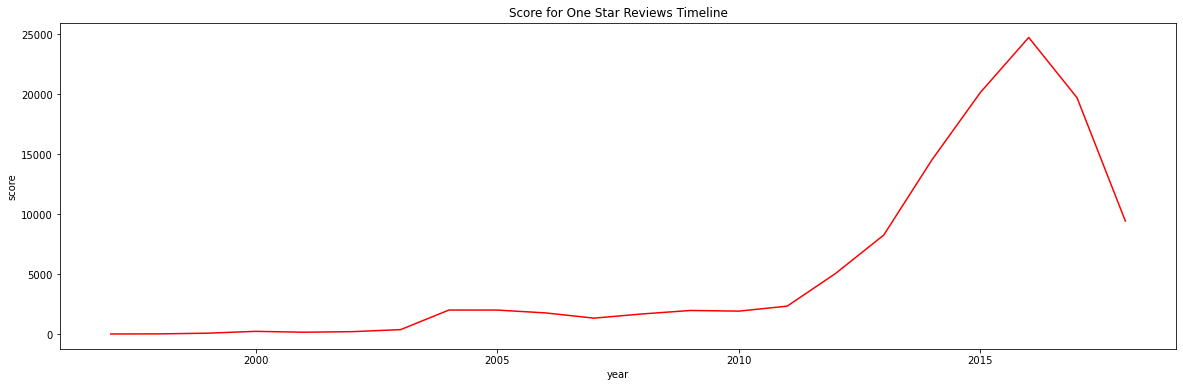

In [46]:
plt.figure(figsize=(20,6))
sns.lineplot(x= 'year' , y= 'score', data=grp_onestar_ds, color = 'red').set_title('Score for One Star Reviews Timeline')
plt.show;

In [47]:
# Dataset of the best scores

just_score = ds[['asin','score','year']]
just_score

fivestar_ds = just_score[just_score['score'] == 5]
fivestar_ds.reset_index(inplace = True, drop = True)
fivestar_ds.head()

,asin,score,year
0,0871202433,5,1997
1,0316332259,5,1997
2,0002553341,5,1997
3,B01FIVVDF6,5,1997
4,000637588X,5,1997


In [48]:
fivestar_ds.shape

(942098, 3)

In [49]:
grp_fivestar_ds = fivestar_ds.groupby(['year'])['score'].agg('sum').reset_index()
grp_fivestar_ds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    22 non-null     int64
 1   score   22 non-null     int64
dtypes: int64(2)
memory usage: 480.0 bytes


In [50]:
grp_fivestar_ds

,year,score
0,1997,245
1,1998,1505
2,1999,4130
3,2000,10855
4,2001,8185
5,2002,10210
6,2003,13030
7,2004,56305
8,2005,44825
9,2006,42000


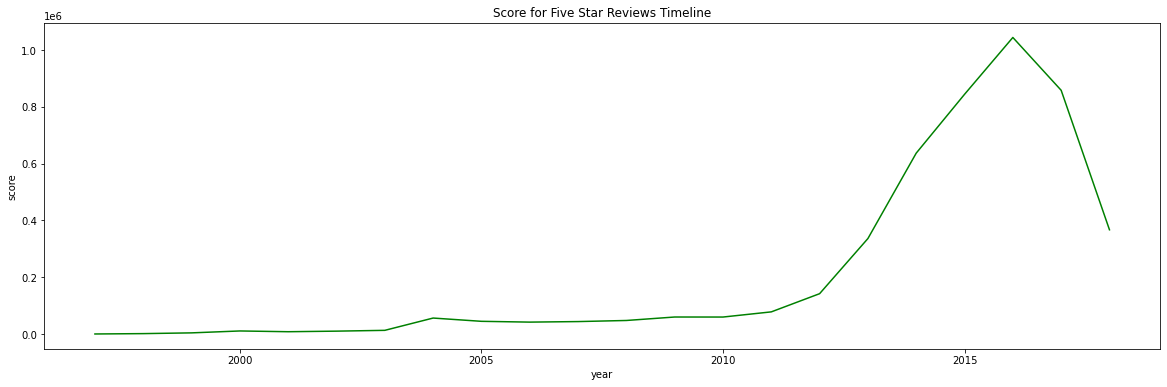

In [51]:
plt.figure(figsize=(20,6))
sns.lineplot(x= 'year' , y= 'score', data=grp_fivestar_ds, color = 'green').set_title('Score for Five Star Reviews Timeline')
plt.show;

In [52]:
# Dataset of review counts

ds_review_counts = ds[['asin','cnt','year']]
grp_ds_review_counts = ds_review_counts.groupby(['year'])['cnt'].agg('sum').reset_index()
grp_ds_review_counts


,year,cnt
0,1997,84
1,1998,444
2,1999,1320
3,2000,3587
4,2001,2712
5,2002,3433
6,2003,4498
7,2004,20130
8,2005,16989
9,2006,15976


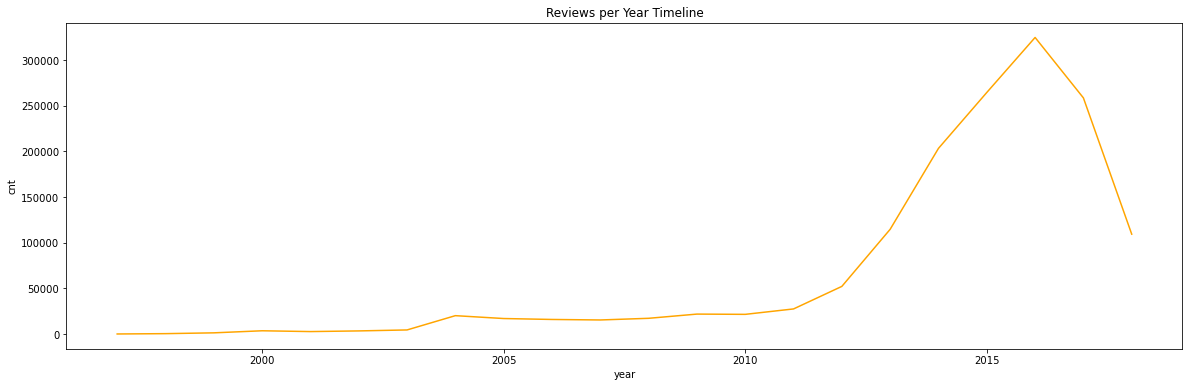

In [53]:
plt.figure(figsize=(20,6))
sns.lineplot(x= 'year' , y= 'cnt', data=grp_ds_review_counts, color = 'orange').set_title('Reviews per Year Timeline')
plt.show;

In [54]:
# Assuming 2018 is incomplete, so checking

ds_yrs = ds[['asin','cnt','year','month']]
ds_yr_2018 = ds_yrs[ds_yrs['year'] == 2018 ]
ds_yr_2018.tail()

,asin,cnt,year,month
1499747,B01EJF0FKQ,1,2018,9
1499748,B01EJFIR92,1,2018,9
1499749,B01ELKP504,1,2018,9
1499750,B01ELB7IY4,1,2018,9
1499751,B01ELFB7J2,1,2018,9


In [55]:
# Indexing with loc

nds = ds.copy()
nds.shape

(1499752, 13)

In [56]:
nds.set_index('asin', inplace = True)
nds.head()

,score,reviewText,reviewerID,summary,timestamp,verified,date,year,month,day,day_of_week,cnt
asin,,,,,,,,,,,,
0871202433,5,"Robert Sylwester's much overlooked book, A Cel...",A2API7H1WS1C56,"A Celebration of Neurons, by Robert Sylwester,",1997-08-09,false,1997-08-09,1997,8,9,5,1
0061535680,1,"Trivia. Dialogue waste of time, paper and add...",AAW5NRUVURHU2,poor entry in derby of books written by lawyers,1997-08-13,false,1997-08-13,1997,8,13,2,1
0316332259,5,Twenty years after his sudden death and a resu...,A1IBMUD9XXD68X,An Icon of His Era And Of All Time,1997-08-17,false,1997-08-17,1997,8,17,6,1
0933149581,3,The author writes about the education of speci...,A1LOZWO9JTN5L8,Wings to Fly: Bringing Theatre Arts to Student...,1997-08-21,false,1997-08-21,1997,8,21,3,1
0356108163,4,A really nice collection of stories by Stephen...,A2ILUXA828DESI,No bones to pick about this book,1997-08-23,false,1997-08-23,1997,8,23,5,1


In [57]:
nds.shape

(1499752, 12)

In [58]:
scoring = ds[['score']]

In [59]:
scoring.shape

(1499752, 1)

In [60]:
scoring['score'].describe()

count    1.499752e+06
mean     4.217880e+00
std      1.248376e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: score, dtype: float64

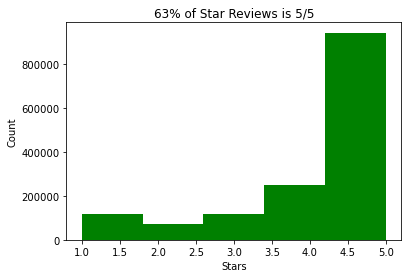

In [61]:
# Create Univariate Histrogram 

import matplotlib as plt
from matplotlib import pyplot

#%matplotlib line
plt.pyplot.hist(scoring, bins=5, color = 'green'); 

plt.pyplot.xlabel("Stars");
plt.pyplot.ylabel("Count");
plt.pyplot.title("63% of Star Reviews is 5/5");

In [62]:
asin_hist_ds = ds[['asin','cnt']]
grp_asin_hist_ds = asin_hist_ds.groupby(['asin'])['cnt'].agg('sum').reset_index()
grp_asin_hist_ds.head()

,asin,cnt
0,0000000116,2
1,0000000868,1
2,0000004545,2
3,0000013765,10
4,0000038504,2


In [63]:
grp_asin_hist_ds['cnt'].describe()

count    129876.000000
mean         11.547568
std          71.825654
min           1.000000
25%           1.000000
50%           2.000000
75%           9.000000
max        6114.000000
Name: cnt, dtype: float64

In [65]:
ds.columns

Index(['asin', 'score', 'reviewText', 'reviewerID', 'summary', 'timestamp',
       'verified', 'date', 'year', 'month', 'day', 'day_of_week', 'cnt'],
      dtype='object')

In [66]:
# Acronym of Machine Learning Data Set for the compact tabular format of key data then:

mlds = ds[['date','asin','summary','reviewText','score']]
mlds.head()

,date,asin,summary,reviewText,score
0,1997-08-09,0871202433,"A Celebration of Neurons, by Robert Sylwester,","Robert Sylwester's much overlooked book, A Cel...",5
1,1997-08-13,0061535680,poor entry in derby of books written by lawyers,"Trivia. Dialogue waste of time, paper and add...",1
2,1997-08-17,0316332259,An Icon of His Era And Of All Time,Twenty years after his sudden death and a resu...,5
3,1997-08-21,0933149581,Wings to Fly: Bringing Theatre Arts to Student...,The author writes about the education of speci...,3
4,1997-08-23,0356108163,No bones to pick about this book,A really nice collection of stories by Stephen...,4


In [68]:
# Loading clean sample data set for machine learning next step with target variable score

mlds.to_parquet('sample_ds_for_ml_7292023pm.parquet')

***

## Disclaimer:

1. *Insights are for the current data set scope which is not the entire data set. This process needs to be iterative or the data set comprehensive for insights to be final. If the sample is representative of the larger data set, then we can use them "as is".*
2. *We will be able to include correlations once metadata is joined with the asins of the data set* 
3. *Data set includes 1'499,752 records which is 1% from the 80% of the entire data set.*

***

# Insights

***

- From the 1'499,752 reviews, only 325 asin have more or equal than 500 reviews.
- There is an overall trend towards more reviews over time which is a good thing as more data can be leveraged on, however, the trend reaches it's peak at year 2016 and then goes back in 2017 to a similar data point as the year prior to the peak (back to 2015 numbers). Then 2018 while incomplete, still seems to now might be less than 2015 yet data might be incomplete so needs to be confirmed once the 2018 data is complete. 
- Score/Review of 1 star only accounts for 117,964 of the 1'499,752 reviews which is 7.87%.
- Score/Review of 4 stars accounts for 249,879 of the 1'499,752 reviews which is 16.66%.
- Score/Review of 5 stars accounts for 942,098 of the 1'499,752 reviews which is 62.82%.


***

# Key Insights

***

##### Ratio of review scoring remains stagnated over time. So neither improvement nor decline over product's reviews. Thus, leveraging on the positive feedback provided takes us to the next point which is the prescriptive analytics phase ...

### It is an overwhelming mayority of positive reviews *(79.48% with either 5 or 4 stars and mean of 4.21 stars)* which allows to better extract what is that consumers like and/or enjoy the most which allows to suggest new products and/or predict customer satisfaction per market needs.

.